In [1]:
import json
import pandas as pd
import json
import requests

In [3]:
#get stock from the user
stock=input()

 AAPL


In [5]:
print("The Stock we will research is:" + stock)

The Stock we will research is:AAPL


In [35]:
apikey = "PS4ebfrwvc3kiMufSdhcI7zosw5j52WR9WJw4Ro4"
url_one = "https://yfapi.net/v6/finance/quote?region=US&lang=en&symbols=AAPL%2CBTC-USD%2CEURUSD%3DX"
querystring_one = {"symbols":stock}
headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url_one, headers=headers, params=querystring_one)
print(response.text)

{"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","typeDisp":"Equity","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"customPriceAlertConfidence":"HIGH","currency":"USD","hasPrePostMarketData":true,"firstTradeDateMilliseconds":345479400000,"priceHint":2,"postMarketChangePercent":-0.127307,"postMarketTime":1727481596,"postMarketPrice":227.5,"postMarketChange":-0.289993,"regularMarketChange":0.20500183,"regularMarketTime":1727467204,"regularMarketDayHigh":229.52,"regularMarketDayRange":"227.3 - 229.52","regularMarketDayLow":227.3,"regularMarketVolume":34025967,"regularMarketPreviousClose":227.52,"bid":227.59,"ask":240.09,"bidSize":5,"askSize":1,"fullExchangeName":"NasdaqGS","financialCurrency":"USD","regularMarketOpen":228.43,"averageDailyVolume3Month":54814806,"averageDailyVolume10Day":76087390,"fiftyTwoWeekLowChange":63.645004,"fiftyTwoWeekLowChangePercent":0.38789007,"fiftyTwoWeekRange":"164.08 - 237.23","fiftyTwoWeekHighChange":-9.50499

In [37]:
#print the company full name, ticker name, 52 week high and 52 week low
stock_json = response.json()

print(stock_json['quoteResponse']['result'][0]["longName"] + 
      " " + stock_json['quoteResponse']['result'][0]["symbol"] +
      " 52 Week High: $" + str(stock_json['quoteResponse']['result'][0]["fiftyTwoWeekHigh"]) +
      " 52 Week Low: $" + str(stock_json['quoteResponse']['result'][0]["fiftyTwoWeekLow"]))

Apple Inc. AAPL 52 Week High: $237.23 52 Week Low: $164.08


In [39]:
apikey = "PS4ebfrwvc3kiMufSdhcI7zosw5j52WR9WJw4Ro4"
url_two = "https://yfapi.net/v11/finance/quoteSummary/AAPL?lang=en&region=US&modules=financialData"
querystring_two = {"symbols":stock}
headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url_two, headers=headers, params=querystring_two)
print(response.text)

{"quoteSummary":{"result":[{"financialData":{"maxAge":86400,"currentPrice":{"raw":227.725,"fmt":"227.73"},"targetHighPrice":{"raw":300.0,"fmt":"300.00"},"targetLowPrice":{"raw":183.86,"fmt":"183.86"},"targetMeanPrice":{"raw":240.58,"fmt":"240.58"},"targetMedianPrice":{"raw":243.0,"fmt":"243.00"},"recommendationMean":{"raw":2.0,"fmt":"2.00"},"recommendationKey":"buy","numberOfAnalystOpinions":{"raw":40,"fmt":"40","longFmt":"40"},"totalCash":{"raw":61801000960,"fmt":"61.8B","longFmt":"61,801,000,960"},"totalCashPerShare":{"raw":4.065,"fmt":"4.07"},"ebitda":{"raw":131781001216,"fmt":"131.78B","longFmt":"131,781,001,216"},"totalDebt":{"raw":101304000512,"fmt":"101.3B","longFmt":"101,304,000,512"},"quickRatio":{"raw":0.798,"fmt":"0.80"},"currentRatio":{"raw":0.953,"fmt":"0.95"},"totalRevenue":{"raw":385603010560,"fmt":"385.6B","longFmt":"385,603,010,560"},"debtToEquity":{"raw":151.862,"fmt":"151.86%"},"revenuePerShare":{"raw":24.957,"fmt":"24.96"},"returnOnAssets":{"raw":0.22612,"fmt":"22.6

In [47]:
#print the current market price and target mean price
quotesummary_json = response.json()

print(" Current Market Price: $" + str(quotesummary_json['quoteSummary']['result'][0]['financialData']["currentPrice"]["fmt"]) + 
      " Target Mean Price: $" + str(quotesummary_json['quoteSummary']['result'][0]['financialData']["targetMeanPrice"]["fmt"]))

 Current Market Price: $227.73 Target Mean Price: $240.58


In [55]:
apikey = "PS4ebfrwvc3kiMufSdhcI7zosw5j52WR9WJw4Ro4"
url_three = "https://yfapi.net/v1/finance/trending/US"
querystring_three = {"symbols":stock}
headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url_three, headers=headers, params=querystring_three)
print(response.text)

{"finance":{"result":[{"count":20,"quotes":[{"symbol":"NQ=F"},{"symbol":"ES=F"},{"symbol":"YM=F"},{"symbol":"AMSC"},{"symbol":"GC=F"},{"symbol":"^N225"},{"symbol":"PWR"},{"symbol":"SNAP"},{"symbol":"CL=F"},{"symbol":"SI=F"},{"symbol":"RTY=F"},{"symbol":"JPY=X"},{"symbol":"^VIX"},{"symbol":"9988.HK"},{"symbol":"EME"},{"symbol":"SOL-USD"},{"symbol":"BTC=F"},{"symbol":"HG=F"},{"symbol":"NG=F"},{"symbol":"NVDA"}],"jobTimestamp":1727655768034,"startInterval":202409292300}],"error":null}}


In [72]:
trending_json = response.json()

trending_stocks = trending_json['finance']['result'][0]['quotes']

print("5 Trending Stocks:")
for i, stock in enumerate(trending_stocks[:5]): 
    print(f"{i+1}. {stock['symbol']}")

5 Trending Stocks:
1. NQ=F
2. ES=F
3. YM=F
4. AMSC
5. GC=F


In [112]:
stock_name = stock_json['quoteResponse']['result'][0]["longName"] 
ticker = stock_json['quoteResponse']['result'][0]["symbol"]
fiftytwo_high = stock_json['quoteResponse']['result'][0]['fiftyTwoWeekHigh']
fiftytwo_low = stock_json['quoteResponse']['result'][0]['fiftyTwoWeekLow']
current_price = quotesummary_json['quoteSummary']['result'][0]['financialData']['currentPrice']['fmt']
target_mean_price = quotesummary_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['fmt']

trending_stocks = [stock['symbol'] for stock in trending_json['finance']['result'][0]['quotes'][:5]]

data = {
    'Stock Name': [stock_name],
    'Ticker': [ticker],
    '52 Week High': [fiftytwo_high],
    '52 Week Low': [fiftytwo_low],
    'Current Price': [current_price],
    'Target Mean Price': [target_mean_price],
    'Trending Stocks': [', '.join(trending_stocks)] 
}

df = pd.DataFrame(data)
print(df)
df.to_csv('stock_data.csv', index=False)

   Stock Name Ticker  52 Week High  52 Week Low Current Price  \
0  Apple Inc.   AAPL        237.23       164.08        227.73   

  Target Mean Price               Trending Stocks  
0            240.58  NQ=F, ES=F, YM=F, AMSC, GC=F  


In [114]:
apikey = "PS4ebfrwvc3kiMufSdhcI7zosw5j52WR9WJw4Ro4"
url_two = "https://yfapi.net/v8/finance/chart/AAPL?range=5d&region=US&interval=1d&lang=en&events=div%2Csplit"
querystring_two = {"symbols":stock}
headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url_two, headers=headers, params=querystring_two)
print(response.text)

{"chart":{"result":[{"meta":{"currency":"USD","symbol":"AAPL","exchangeName":"NMS","fullExchangeName":"NasdaqGS","instrumentType":"EQUITY","firstTradeDate":345479400,"regularMarketTime":1727467204,"hasPrePostMarketData":true,"gmtoffset":-14400,"timezone":"EDT","exchangeTimezoneName":"America/New_York","regularMarketPrice":227.725,"fiftyTwoWeekHigh":229.52,"fiftyTwoWeekLow":227.3,"regularMarketDayHigh":229.52,"regularMarketDayLow":227.3,"regularMarketVolume":34025967,"longName":"Apple Inc.","shortName":"Apple Inc.","chartPreviousClose":228.2,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EDT","start":1727424000,"end":1727443800,"gmtoffset":-14400},"regular":{"timezone":"EDT","start":1727443800,"end":1727467200,"gmtoffset":-14400},"post":{"timezone":"EDT","start":1727467200,"end":1727481600,"gmtoffset":-14400}},"dataGranularity":"1d","range":"5d","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[1727098200,1727184600,1727271000,172735740

In [129]:
chart_json = response.json()
five_day_high = chart_json['chart']['result'][0]['indicators']['quote'][0]['high']
print(five_day_high)

[229.4499969482422, 229.35000610351562, 227.2899932861328, 228.5, 229.52000427246094]


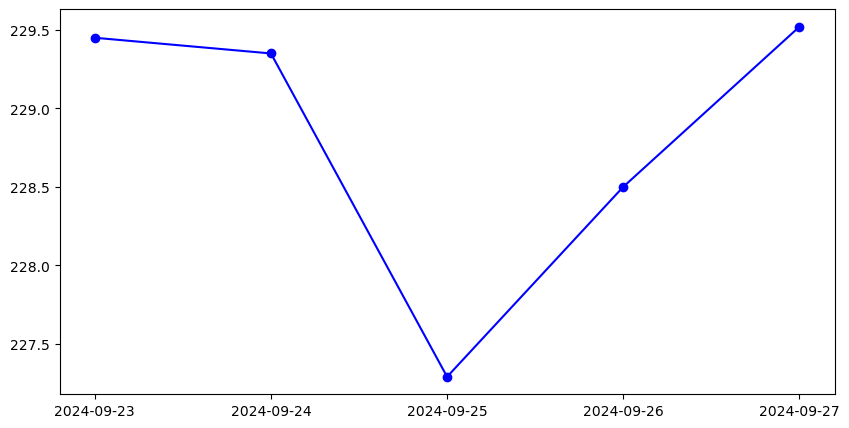

In [133]:
import matplotlib.pyplot as plt

timestamps = chart_json['chart']['result'][0]['timestamp']
dates = pd.to_datetime(timestamps, unit='s').strftime('%Y-%m-%d')
plt.figure(figsize=(10, 5))
plt.plot(dates, five_day_high, marker='o', linestyle='-', color='b', label='High Prices')

plt.show()